In [1]:
import pandas as pd
df = pd.read_csv("kc_house_data.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [2]:
df.isnull().sum()


,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [3]:
feature_cols = [
    "sqft_living",   # main size of the house
    "bedrooms",
    "bathrooms",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "yr_renovated"
]

X = df[feature_cols]
y = df["price"]


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Handle missing values by dropping rows with NaNs
# Find the indices of rows without NaNs in X and apply to both X and y
valid_indices = X.dropna().index
X = X.loc[valid_indices]
y = y.loc[valid_indices]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

RMSE: 223559.6265610087
R²: 0.6654722025883303


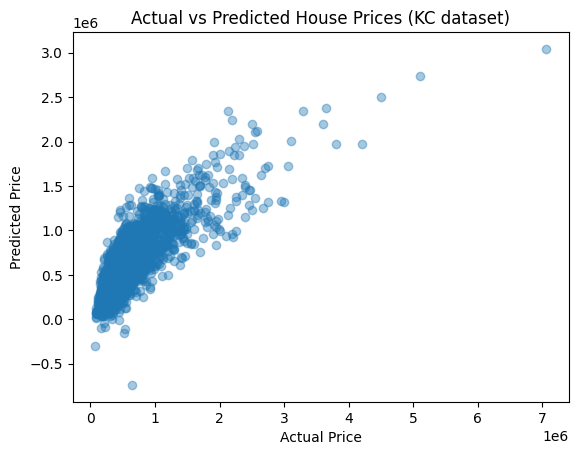

,0
waterfront,510590.500686
grade,124395.913268
bathrooms,48939.672945
view,45967.848920
floors,26141.128302
condition,19293.440575
sqft_living,111.069852
sqft_basement,57.761111
sqft_above,53.308741
yr_renovated,6.107386


In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (KC dataset)")
plt.show()

import pandas as pd
coeffs = pd.Series(model.coef_, index=feature_cols).sort_values(ascending=False)
coeffs


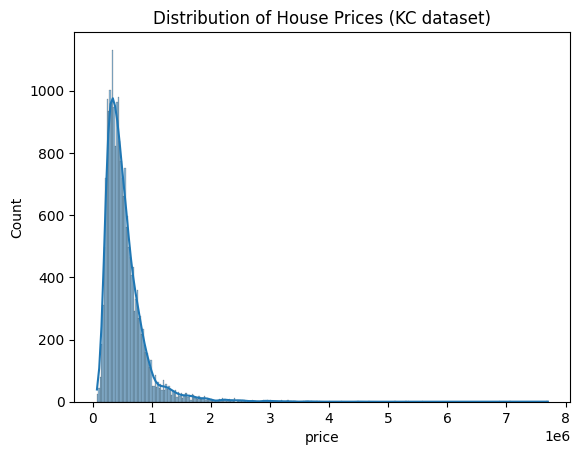

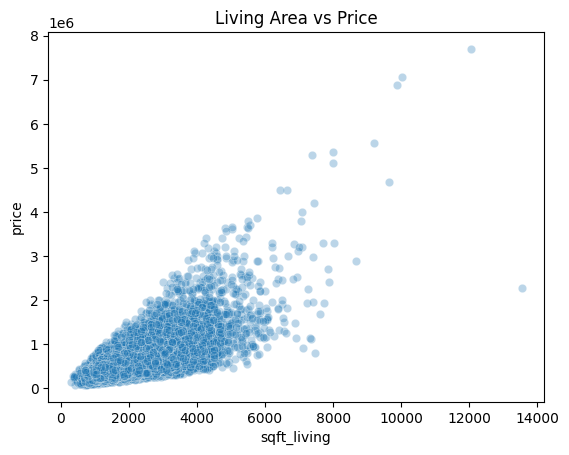

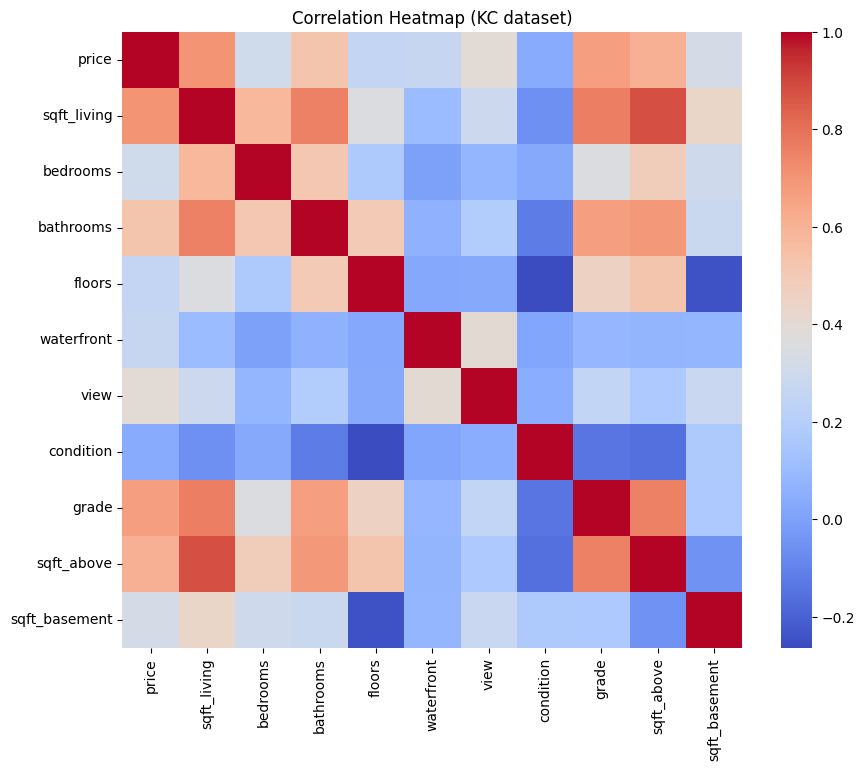

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price distribution
sns.histplot(df["price"], kde=True)
plt.title("Distribution of House Prices (KC dataset)")
plt.show()

# sqft_living vs price
sns.scatterplot(x="sqft_living", y="price", data=df, alpha=0.3)
plt.title("Living Area vs Price")
plt.show()

# Correlation heatmap (subset columns to keep it readable)
corr_cols = ["price","sqft_living","bedrooms","bathrooms","floors",
             "waterfront","view","condition","grade","sqft_above",
             "sqft_basement"]
plt.figure(figsize=(10,8))
sns.heatmap(df[corr_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (KC dataset)")
plt.show()


- Houses with **waterfront** views command a very large price premium, as shown by the high positive coefficient for `waterfront`.
- Higher **grade** and better **view** scores are strongly associated with higher sale prices, reflecting overall quality and perceived desirability.
- More **bathrooms** and additional **floors** increase the predicted price, indicating buyers value extra comfort and vertical space.
- Larger **living area (`sqft_living`)** is positively correlated with price, although with diminishing returns at very large sizes.
- The model achieves an R² of about 0.67, meaning it explains roughly two‑thirds of the variation in house prices in this dataset.